# 911 Emergency Calls Data Analysis

We will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [80]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv("911.csv")

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df['zip'].value_counts().reset_index()[:5]

,index,zip
0,19401.0,6979
1,19464.0,6643
2,19403.0,4854
3,19446.0,4748
4,19406.0,3174


** What are the top 5 townships (twp) for 911 calls? **

In [8]:
df['twp'].value_counts().reset_index()[:5]

,index,twp
0,LOWER MERION,8443
1,ABINGTON,5977
2,NORRISTOWN,5890
3,UPPER MERION,5227
4,CHELTENHAM,4575


** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [10]:
df['reason'] = df['title'].apply(lambda x: x.split(":")[0])
df[['title', 'reason']].head()

,title,reason
0,EMS: BACK PAINS/INJURY,EMS
1,EMS: DIABETIC EMERGENCY,EMS
2,Fire: GAS-ODOR/LEAK,Fire
3,EMS: CARDIAC EMERGENCY,EMS
4,EMS: DIZZINESS,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

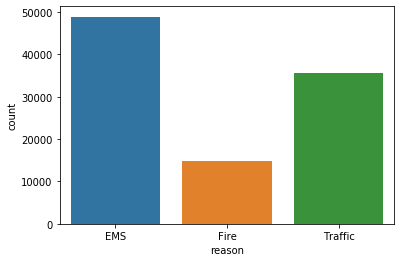

In [15]:
sns.countplot(df['reason'])

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [16]:
df['timeStamp'].dtype

dtype('O')

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [19]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], yearfirst=True)

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

In [20]:
time = df['timeStamp']
time.dt.weekday_name

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
           ...    
99487    Wednesday
99488    Wednesday
99489    Wednesday
99490    Wednesday
99491    Wednesday
Name: timeStamp, Length: 99492, dtype: object

In [21]:
df['hour'] = df['timeStamp'].apply(lambda x:x.hour)
df['month'] = df['timeStamp'].apply(lambda x:x.month)
df['dayofweek'] = df['timeStamp'].dt.weekday_name

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

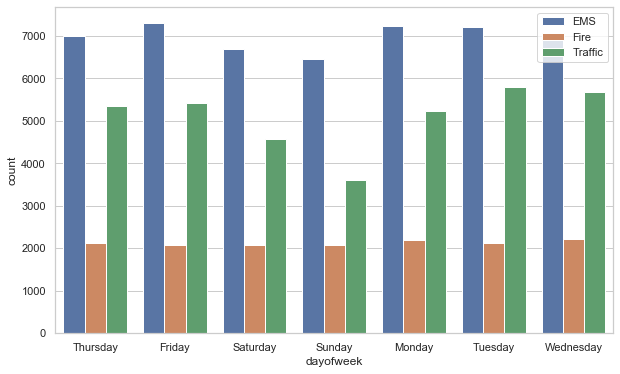

In [22]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['dayofweek'], hue=df['reason'])
plt.legend(loc='upper right')

**Now do the same for Month:**

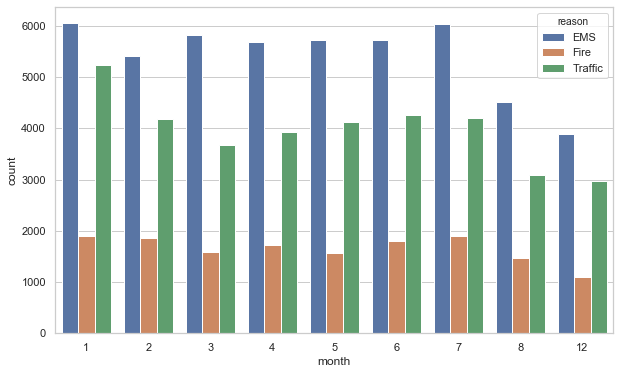

In [23]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(x=df['month'], hue=df['reason'])

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [24]:
by_month = df.groupby('month').count()
by_month = by_month.reset_index()

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

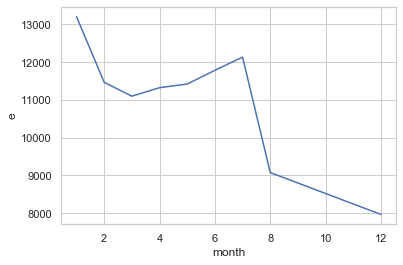

In [25]:
sns.lineplot(x= by_month.month, y=by_month.e)

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

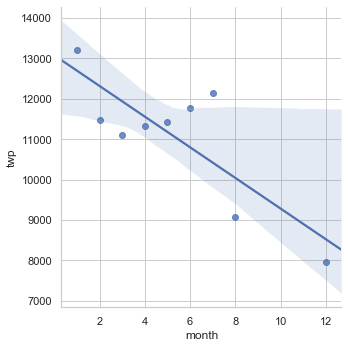

In [30]:
sns.lmplot(x='month',y='twp',data=by_month.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [38]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())
df['date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

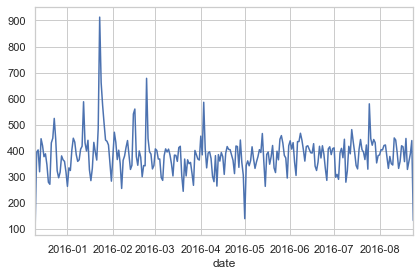

In [52]:
df.groupby("date").count()["twp"].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

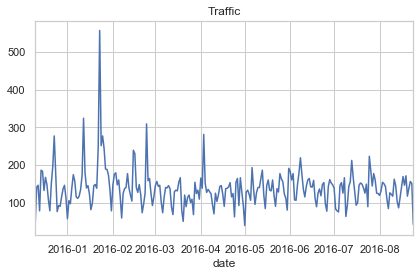

In [56]:
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

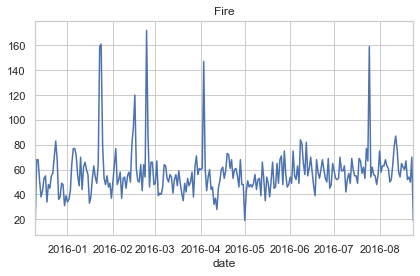

In [57]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

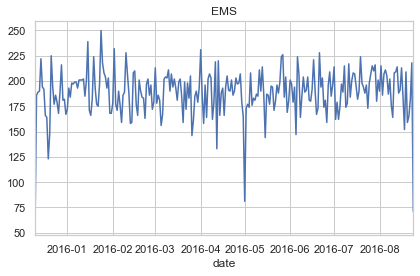

In [58]:
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [60]:
dayHour = df.groupby(by=['dayofweek','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

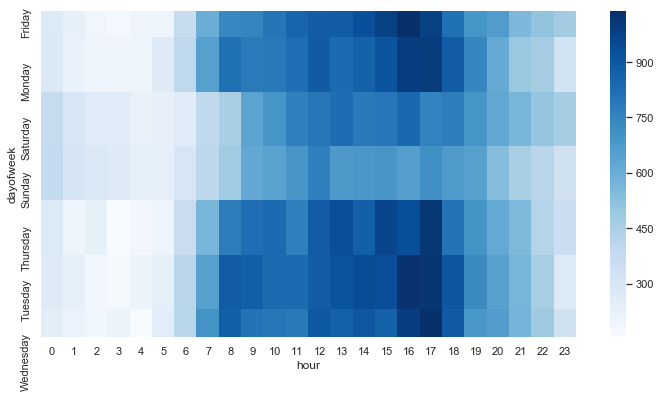

In [63]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap="Blues")

** Now create a clustermap using this DataFrame. **

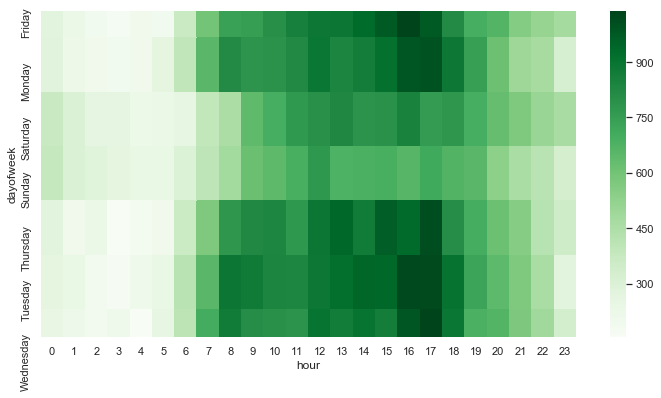

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap="Greens")

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [68]:
dayMonth = df.groupby(by=['dayofweek','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266


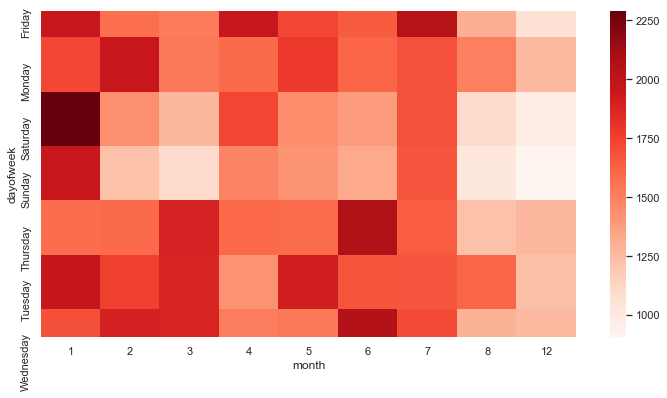

In [72]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap="Reds")

<Figure size 864x432 with 0 Axes>

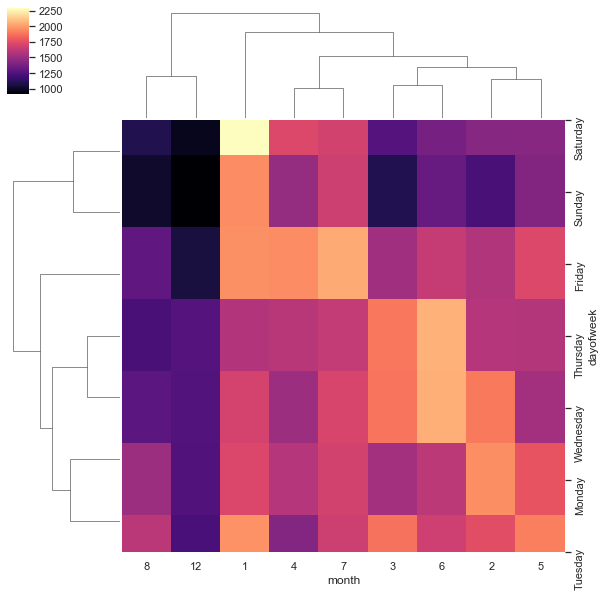

In [78]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth, cmap="magma")